<a href="https://colab.research.google.com/github/yunju-1118/ESAA/blob/main/ESAA_YB_week3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시계열 데이터
## datetime 오브젝트
datetime 라이브러리는 **날짜와 시간을 처리**하는 등의 다양한 기능을 제공하는 파이썬 라이브러리이다. datetime 라이브러리에는 날짜를 처리하는 **date 오브젝트**, 시간을 처리하는 **time 오브젝트**, 날짜와 시간을 모두 처리하는 **datetime 오브젝트**가 포함되어 있다.

In [ ]:
# import library
from datetime import datetime

# 현재 시간 출력
now1 = datetime.now()
print(now1)

now2 = datetime.today()
print(now2)

2025-03-21 12:55:31.826598
2025-03-21 12:55:31.826791


In [ ]:
# 시간을 직접 입력할 수도 있음
t1 = datetime.now()
t2 = datetime(1970, 1, 1)
t3 = datetime(1970, 12, 12, 13, 24, 34)

print(t1)
print(t2)
print(t3)

2025-03-21 12:55:35.159686
1970-01-01 00:00:00
1970-12-12 13:24:34


In [ ]:
diff1 = t1-t2
print(diff1)
print(type(diff1))

20168 days, 12:55:35.159686
<class 'datetime.timedelta'>


In [ ]:
diff2 = t2-t1
print(diff2)
print(type(diff2))

-20169 days, 11:04:24.840314
<class 'datetime.timedelta'>


datetime 오브젝트를 사용하는 이유 중 하나는 시간 계산을 할 수 있다는 점이다.

### datetime 오브젝트로 변환하기 - to_datetime 메서드

경우에 따라서는 시계열 데이터를 문자열로 저장해야 할 때도 있다. 하지만, 문자열은 시간 계산을 할 수 없기 때문에 datetime 오브젝트로 변환해 주어야 한다.

In [ ]:
import pandas as pd
import os

ebola = pd.read_csv('country_timeseries.csv')

print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

문자열로 저장된 Date 열이 존재함을 알 수 있다

In [ ]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

to_datetime 메서드를 사용하여 Date 열의 자료형을 datetime 오브젝트로 변환한 뒤, ebola 데이터프레임에 새로운 열로 추가한다.

In [ ]:
test_df1 = pd.DataFrame({'order_day':['01/01/15', '02/01/15', '03/01/15']})

test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format = '%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format = '%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format = '%d/%m/%y')

print(test_df1)

  order_day   date_dt1   date_dt2
0  01/01/15 2015-01-01 2015-01-01
1  02/01/15 2015-01-02 2015-01-02
2  03/01/15 2015-01-03 2015-01-03


In [ ]:
test_df2 = pd.DataFrame({'order_day':['01-01-15', '02-01-15', '03-01-15']})

test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format = '%d-%m-%y')

print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


시간 형식 지정자(%d, %m, %y)와 기호(/,-)를 적절히 조합하여 format 인자에 전달하면 그 형식에 맞게 정리된 오브젝트를 얻을 수도 있다.

### 시간 형식 지정자
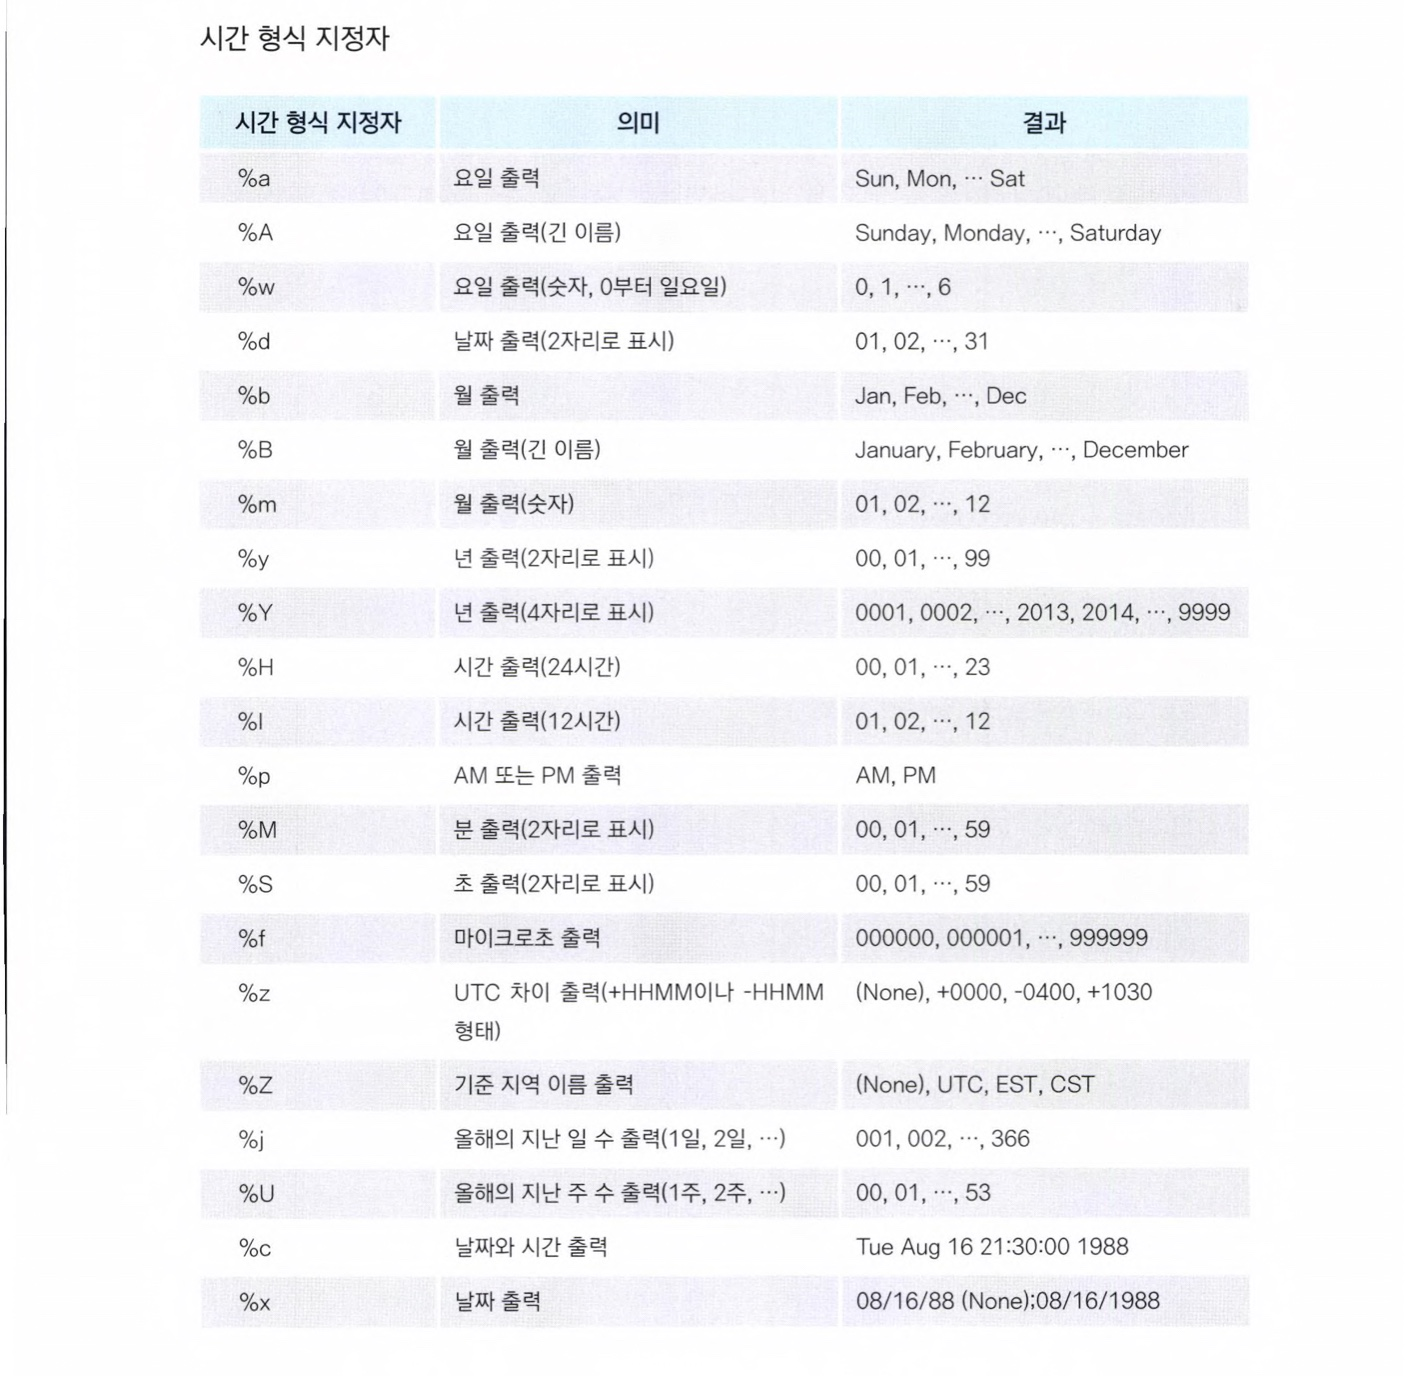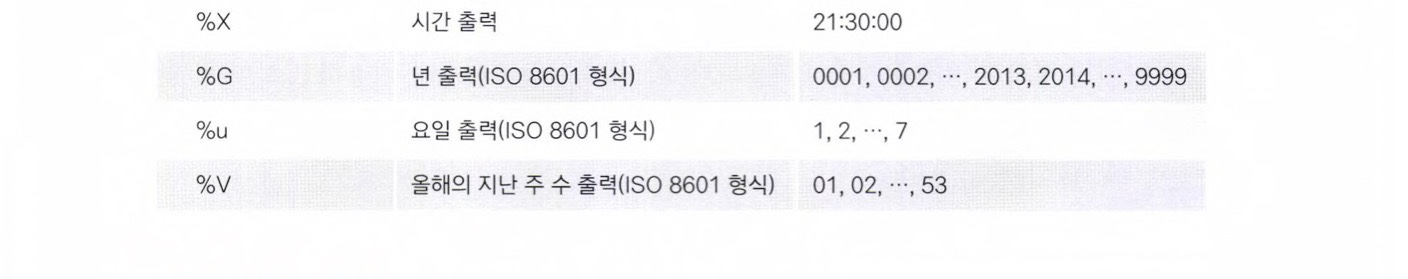

시계열 데이터를 구분해서 추출하기

In [ ]:
now = datetime.now()
print(now)

2025-03-21 13:01:26.522519


In [ ]:
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

2025-03-21


In [ ]:
nowTime = now.strftime('%H:%M:%S')
print(nowTime)

13:01:26


In [ ]:
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2025-03-21 13:01:26


원하는 시계열 데이터의 시간 요소가 연도, 월, 일 뿐이라면 strftime 메서드와 시간 형식 지정자를 이용해 시계열 데이터를 잘라낼 수 있다.

### datetime 오브젝트로 변환하기 - read_csv 메서드
앞에서는 to_datetime 메서드를 이용해 Date열을 datetime 오브젝트로 변환하였다. datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합을 불러오는 것이 더욱 간단하다.

In [ ]:
ebola1 = pd.read_csv('country_timeseries.csv', parse_dates=['Date'])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

read_csv 메서드의 **parse_dates** 인자에 datetime 오브젝트로 변환하고자 하는 열의 이름을 전달하여 데이터 집합을 불러오면 Date 열이 datetime 오브젝트로 변하는 것을 알 수 있다.

### datetime 오브젝트에서 날짜 정보 추출하기
datetime 오브젝트에는 년, 월, 일과 같은 날짜 정보를 저장하고 있는 속성이 이미 준비되어 있다.

In [ ]:
data_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
d1 = pd.to_datetime(data_series)

print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [ ]:
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2018
5
16


datetime 오브젝트의 year, month, day 속성을 이용하면 년, 월, 일 정보를 바로 추출할 수 있다.

### df 접근자 사용하기
문자열을 처리하려면 str 접근자를 사용한 다음 문자열 속성이나 메서드를 사용해야 했다. datetime 오브젝트도 마찬가지로 dt 접근자를 사용하면 datetime 속성이나 메서드를 사용해 시계열 데이터를 처리할 수 있다.

In [ ]:
ebola = pd.read_csv('country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

print(ebola[['Date', 'date_dt']].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


In [ ]:
print(ebola['date_dt'][3].year)
print(ebola['date_dt'][3].month)
print(ebola['date_dt'][3].day)

2015
1
2


dt 접근자를 사용하지 않고 인덱스가 3인 데이터의 년, 월, 일 데이터를 추출한 것이다. 이 방법은 date_dt 열의 특정 데이터를 인덱스로 접근해야 하기에 불편하다.

In [ ]:
ebola['year'] = ebola['date_dt'].dt.year

print(ebola[['Date','date_dt','year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [ ]:
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)

print(ebola[['Date','date_dt','year','month','day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


In [ ]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

**dt 접근자**로 date_dt 열에 한 번에 접근한 다음 year, month, day 속성을 이용하여 값을 간편하게 추출할 수 있다. 여기서 새로 만들어진 year, month, day 열의 자료형은 정수형이다.

## 사례별 시계열 데이터 계산하기

#### 에볼라 최초 발병일 계산하기

In [ ]:
# 시간순으로 데이터를 보기 위해 데이터 프레임의 마지막부터 살펴보기
print(ebola.iloc[-5:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


In [ ]:
# min 메서드를 사용해 에볼라의 최초 발병일 찾기
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


에볼라가 발생하기 시작한 날은 2014년 03월 22일로 알 수 있다.

In [ ]:
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()

print(ebola[['Date', 'Day', 'outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


에볼라의 최초 발병일을 알아냈으므로 Date 열에서 에볼라의 최초 발병일을 빼면 에볼라의 진행 정도를 알 수 있다.

#### 파산한 은행의 개수 계산하기


In [ ]:
banks = pd.read_csv('banklist.csv')
print(banks.head())

                                           Bank Name                City  ST  \
0                                Fayette County Bank          Saint Elmo  IL   
1  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee  WI   
2                                     First NBC Bank         New Orleans  LA   
3                                      Proficio Bank  Cottonwood Heights  UT   
4                      Seaway Bank and Trust Company             Chicago  IL   

    CERT                Acquiring Institution Closing Date Updated Date  
0   1802            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
1  30003  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
2  58302                         Whitney Bank    28-Apr-17    26-Jul-17  
3  35495                    Cache Valley Bank     3-Mar-17    18-May-17  
4  19328                  State Bank of Texas    27-Jan-17    18-May-17  


banks 데이터프레임의 앞부분을 살펴보면 Closing Date, Updated Date 열의 자료형이 시계열 데이터라는 것을 알 수 있다.

In [ ]:
banks_no_dates = pd.read_csv('banklist.csv')
print(banks_no_dates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              553 non-null    object
 1   City                   553 non-null    object
 2   ST                     553 non-null    object
 3   CERT                   553 non-null    int64 
 4   Acquiring Institution  553 non-null    object
 5   Closing Date           553 non-null    object
 6   Updated Date           553 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.4+ KB
None


In [ ]:
banks = pd.read_csv('banklist.csv', parse_dates=[5,6])
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              553 non-null    object        
 1   City                   553 non-null    object        
 2   ST                     553 non-null    object        
 3   CERT                   553 non-null    int64         
 4   Acquiring Institution  553 non-null    object        
 5   Closing Date           553 non-null    datetime64[ns]
 6   Updated Date           553 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.4+ KB
None


<ipython-input-33-57e7b5130df7>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks = pd.read_csv('banklist.csv', parse_dates=[5,6])
<ipython-input-33-57e7b5130df7>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks = pd.read_csv('banklist.csv', parse_dates=[5,6])


parse_dates 속성을 이용해 Closing Date와 Updated Date를 datetime 오브젝트로 불러온다.

In [ ]:
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)

print(banks.head())

                                           Bank Name                City  ST  \
0                                Fayette County Bank          Saint Elmo  IL   
1  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee  WI   
2                                     First NBC Bank         New Orleans  LA   
3                                      Proficio Bank  Cottonwood Heights  UT   
4                      Seaway Bank and Trust Company             Chicago  IL   

    CERT                Acquiring Institution Closing Date Updated Date  \
0   1802            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
1  30003  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
2  58302                         Whitney Bank   2017-04-28   2017-07-26   
3  35495                    Cache Valley Bank   2017-03-03   2017-05-18   
4  19328                  State Bank of Texas   2017-01-27   2017-05-18   

   closing_quarter  closing_year  
0                2          2017 

dt 접근자와 quarter 속성을 이용해 은행이 파산한 분기를 알 수 있다.

In [ ]:
closing_year = banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      6
dtype: int64


groupby 메서드를 사용해 연도별 파산한 은행의 수를 알 수 있다.

In [ ]:
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

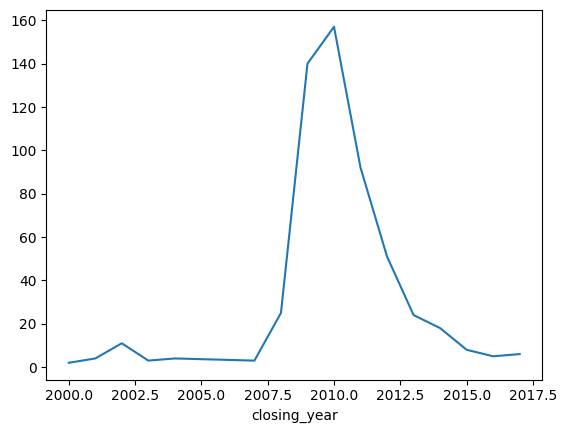

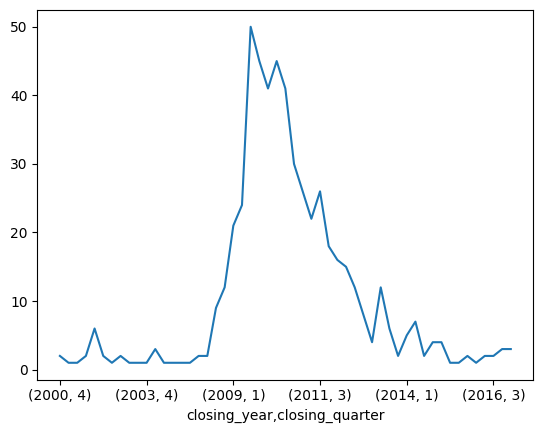

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

마찬가지로 groupby 메서드를 이용해 각 연도별, 분기별로 파산한 은행의 개수도 알아보고 시각화 할 수 있다.

#### 테슬라 주식 데이터로 시간 계산하기

In [ ]:
tesla = pd.read_csv('tesla_stock_quandl.csv')

tesla.head()

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
0,2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0
1,2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0
2,2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0
3,2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0
4,2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0


In [ ]:
tesla = pd.read_csv('tesla_stock_quandl.csv', parse_dates=[0])
print(tesla.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1949 non-null   datetime64[ns]
 1   Open        1949 non-null   float64       
 2   High        1949 non-null   float64       
 3   Low         1949 non-null   float64       
 4   Close       1949 non-null   float64       
 5   Volume      1949 non-null   float64       
 6   ExDividend  1949 non-null   float64       
 7   SplitRatio  1949 non-null   float64       
 8   AdjOpen     1949 non-null   float64       
 9   AdjHigh     1949 non-null   float64       
 10  AdjLow      1949 non-null   float64       
 11  AdjClose    1949 non-null   float64       
 12  AdjVolume   1949 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 198.1 KB
None


Date 열의 자료형을 dateitme 오브젝트로 변환하였다.



In [ ]:
print(tesla.loc[(tesla.Date.dt.year == 2010) & (tesla.Date.dt.month == 6)])

           Date   Open     High    Low  Close      Volume  ExDividend  \
1947 2010-06-30  25.79  30.4192  23.30  23.83  17187100.0         0.0   
1948 2010-06-29  19.00  25.0000  17.54  23.89  18766300.0         0.0   

      SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
1947         1.0    25.79  30.4192   23.30     23.83  17187100.0  
1948         1.0    19.00  25.0000   17.54     23.89  18766300.0  


dt 접근자를 사용해 불린 추출로 2010년 6월의 데이터만 추출한다.

### datetime 오브젝트와 인덱스 - DatetimeIndex

datetime 오브젝트를 데이터프레임의 인덱스로 설정하면 원하는 시간의 데이터를 바로 추출할 수 있어 편리하다.

In [ ]:
tesla.index = tesla['Date']
print(tesla.index)

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2010-07-13', '2010-07-12', '2010-07-09', '2010-07-08',
               '2010-07-07', '2010-07-06', '2010-07-02', '2010-07-01',
               '2010-06-30', '2010-06-29'],
              dtype='datetime64[ns]', name='Date', length=1949, freq=None)


Date 열을 tesla 데이터프레임의 인덱스로 지정한다.

In [ ]:
print(tesla.loc['2015'].iloc[:5,:5])

                 Date    Open     High       Low   Close
Date                                                    
2015-12-31 2015-12-31  238.51  243.450  238.3700  240.01
2015-12-30 2015-12-30  236.60  243.634  235.6707  238.09
2015-12-29 2015-12-29  230.06  237.720  229.5470  237.19
2015-12-28 2015-12-28  231.49  231.980  225.5400  228.95
2015-12-24 2015-12-24  230.56  231.880  228.2800  230.57


In [ ]:
print(tesla.loc['2010-06'].iloc[:,:5])

                 Date   Open     High    Low  Close
Date                                               
2010-06-30 2010-06-30  25.79  30.4192  23.30  23.83
2010-06-29 2010-06-29  19.00  25.0000  17.54  23.89


datetime 오브젝트를 인덱스로 지정해 원하는 시간의 데이터를 바로 추출할 수 있다.

### 시간 간격과 인덱스 - TimedeltaIndex

datetime 오브젝트를 인덱스로 지정하는 것이 아닌 시간 간격을 인덱스로 지정할 수 있다. 이는 예를 들어 주식 데이터에서 최초 5일간 수집된 데이터만 살펴보고 싶을 때 사용할 수 있다.

In [ ]:
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
print(tesla.head())

                 Date    Open    High     Low   Close      Volume  ExDividend  \
Date                                                                            
2018-03-27 2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
2018-03-26 2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2018-03-23 2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
2018-03-22 2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
2018-03-21 2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

            SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  \
Date                                                                     
2018-03-27         1.0   304.00   304.27  277.18    279.18  13696168.0   
2018-03-26         1.0   307.34   307.59  291.36    304.18   8324639.0   
2018-03-23         1.0   311.25   311.61  300.45    301.54   6600538.0   
2018-03-22         1.0   313.89   318.82  308.18    309.10   4

Date 열에서 Date 열의 최솟값을 빼는 방법으로 데이터를 수집한 이후에 시간을 계산하여 ref_date 열로 추가한다.

In [ ]:
tesla.index = tesla['ref_date']
print(tesla.iloc[:5,:5])

                Date    Open    High     Low   Close
ref_date                                            
2828 days 2018-03-27  304.00  304.27  277.18  279.18
2827 days 2018-03-26  307.34  307.59  291.36  304.18
2824 days 2018-03-23  311.25  311.61  300.45  301.54
2823 days 2018-03-22  313.89  318.82  308.18  309.10
2822 days 2018-03-21  310.25  322.44  310.19  316.53


ref_date를 인덱스로 지정하여 시간 간격을 이용해 데이터를 추출할 수 있다.

In [ ]:
print(tesla['5 days':].iloc[:5,:5])

               Date   Open     High    Low  Close
ref_date                                         
3 days   2010-07-02  23.00  23.1000  18.71  19.20
2 days   2010-07-01  25.00  25.9200  20.27  21.96
1 days   2010-06-30  25.79  30.4192  23.30  23.83
0 days   2010-06-29  19.00  25.0000  17.54  23.89


데이터를 수집한 이후 최초 5일의 데이터를 추출한다.

### 시간 범위와 인덱스

앞에서 사용한 데이터에서는 누락된 데이터가 없지만, 가끔 누락된 데이터가 존재할 수 있다. 따라서, 이런 경우 임의로 시간 범위를 생성하여 인덱스로 지정해야 한다.

In [ ]:
ebola = pd.read_csv('country_timeseries.csv', parse_dates=[0])
print(ebola.iloc[:5,:5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


에볼라 데이터의 가장 앞쪽을 살펴보면 2015년 01월 01일의 데이터가 누락되었음을 알 수 있다.

In [ ]:
print(ebola.iloc[-5:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


뒤쪽에서도 2014년 03월 23일의 데이터가 누락되었음을 알 수 있다.

In [ ]:
head_range = pd.date_range(start='2014-12-31', end='2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


date_range 메서드를 이용해 2014년 12월 31일부터 2015년 1월 5일 사이의 시간 인덱스를 생성한다.

In [ ]:
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']
ebola_5.reindex(head_range)
print(ebola_5.iloc[:5,:5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


원본 데이터의 손상을 막기 위해 ebola 데이터프레임의 앞쪽 5개 데이터를 추출해 새로운 데이터프레임을 만든다. 이때 **Date 열을 먼저 인덱스로 지정**한 뒤, 앞에서 만든 시간 범위를 인덱스로 지정한다.

#### 시간 범위의 주기 설정하기
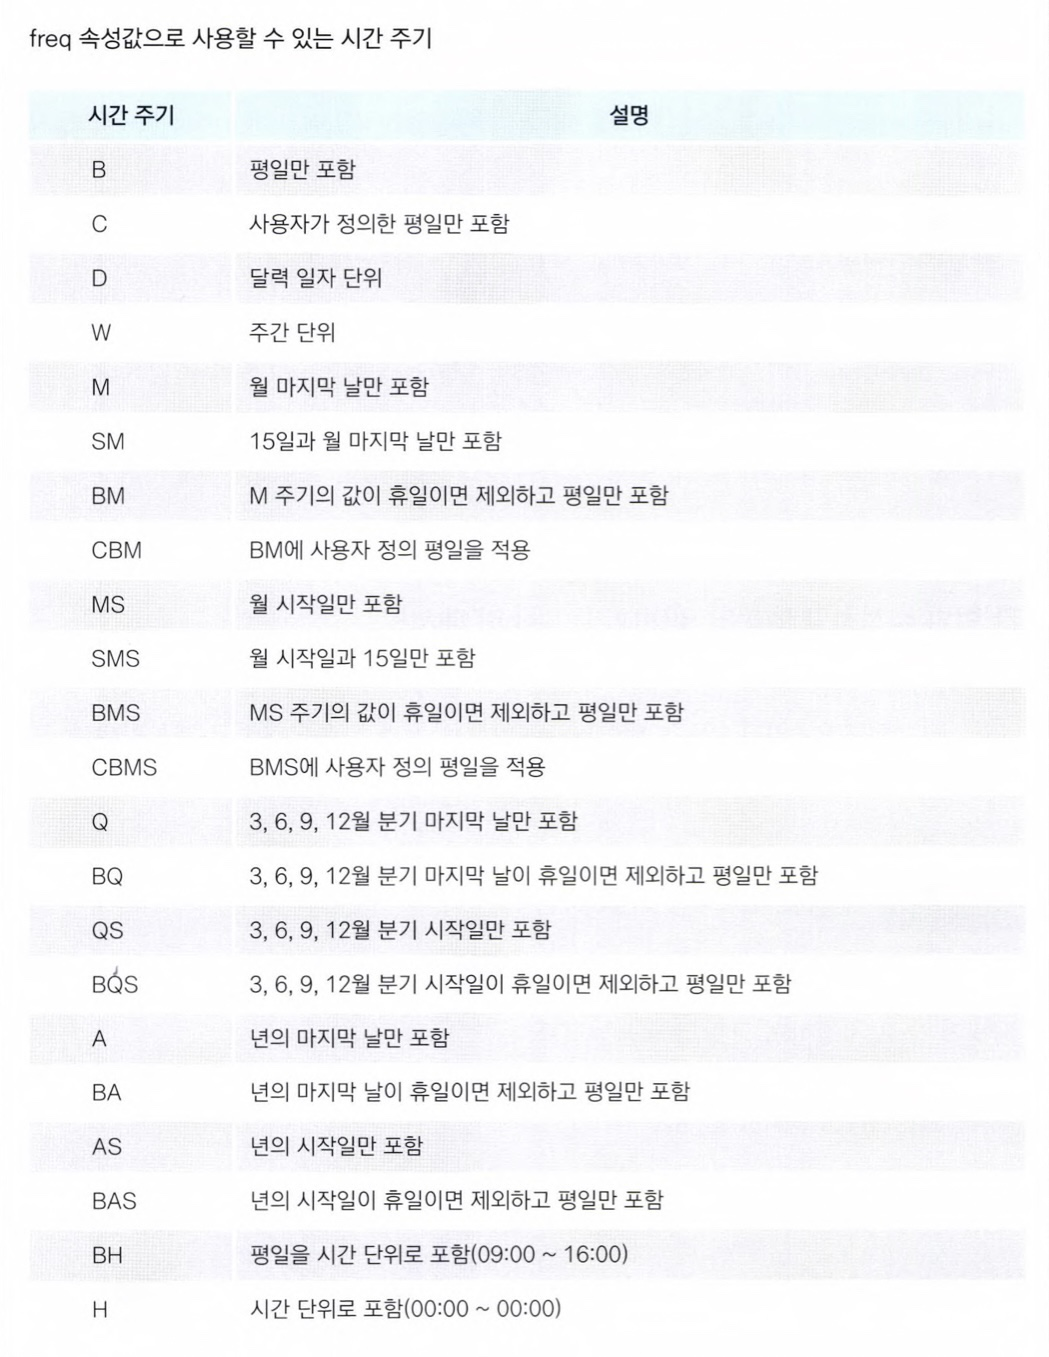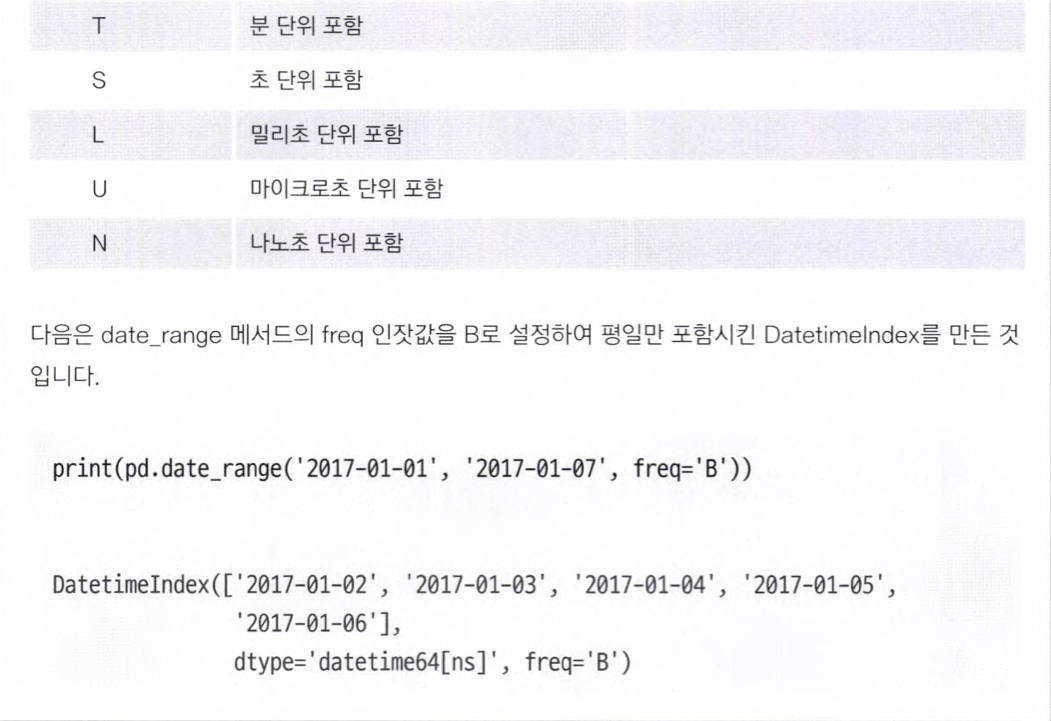

### 시간 범위 수정하고 데이터 밀어내기 - shift 메서드
만약 나라별로 에볼라의 확산 속도를 비교하려면 발생하기 시작한 날짜를 옮기는 것이 좋다. ebola 데이터프레임으로 그래프를 그려보고 에볼라의 확산 속도를 비교하는 데 어떤 문제가 있는지 알아보자.

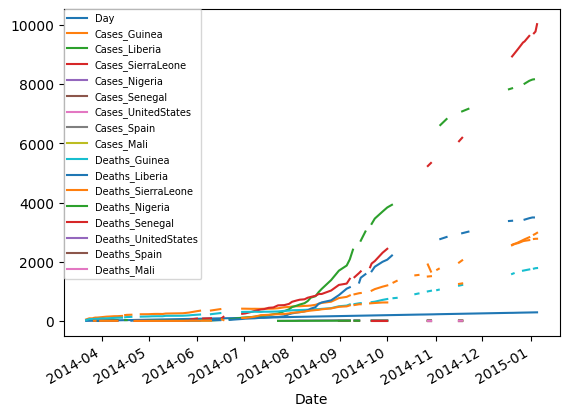

In [ ]:
import matplotlib.pyplot as plt

ebola.index = ebola['Date']

fig, ax = plt.subplots()
ax = ebola.iloc[0:, 1:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

ebola 데이터프레임의 Date 열을 인덱스로 지정한 뒤, x축을 Date열로 y축을 사망자로 지정해 그래프를 그려보았다. 하지만, 각 나라의 에볼라 발병일이 달라 그래프가 그려지기 시작한 지점이 다르다는 것을 알 수 있다. 따라서, 각 나라의 발병일을 가장 처음 에볼라가 발병한 Guinea와 동일한 위치로 옮겨야 나라별 에볼라의 확산 속도를 제대로 비교할 수 있다.

In [ ]:
ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']]
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


예를 들어, Liberia는 발병일을 4만큼 옮겨야 한다.

In [ ]:
ebola = pd.read_csv("country_timeseries.csv", parse_dates = [0])
print(ebola.head().iloc[:,:5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [ ]:
print(ebola.tail().iloc[:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


데이터프레임을 다시 살펴보았더니 중간에 아예 날짜가 없는 데이터도 있다.

In [ ]:
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())

Date 열을 인덱스로 지정한 뒤, ebola 데이터 프레임의 Date 열의 최댓값과 최솟값으로 시간 범위를 생성해 new_idx에 저장하였다. 이를 통해 날짜가 아예 없던 데이터의 인덱스를 설정할 수 있다.

In [ ]:
print(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [ ]:
new_idx = reversed(new_idx)

하지만, new_idx는 ebola 데이터 집합에 있는 시간 순서와 반대로 지정되어 있어 reversed 메서드를 이용해 인덱스를 반대로 뒤집어 주었다.

In [ ]:
ebola = ebola.reindex(new_idx)

print(ebola.head().iloc[:,:5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN


In [ ]:
print(ebola.tail().iloc[:,:5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-22 2014-03-22  0.0          49.0            NaN                NaN


reindex 메서드를 사용해 새로 생성한 인덱스를 새로운 인덱스로 지정한다. 이를 통해 ebola 데이터 프레임에 아예 없던 날짜가 추가됨을 알 수 있다.

In [ ]:
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [ ]:
first_valid = ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]


last_valid_index, first_valid_index 메서드를 이용해 각 나라의 에볼라 발병일을 구한다. 각각의 메서드는 유효한 값이 있는 첫 번째와 마지막 인덱스를 반환한다.

In [ ]:
earliest_date = ebola.index.min()
print(earliest_date)

2014-03-22 00:00:00


In [ ]:
shift_values = last_valid - earliest_date
print(shift_values)

Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


각 나라의 에볼라 발병일을 동일한 출발선으로 옮기려면 에볼리가 가장 처음 발병한 날에서 각 나라의 에볼라 발병일을 뺀 만큼 옮기면 된다.

In [ ]:
ebola_dict = {}
for idx, col in enumerate(ebola):
  d = shift_values[idx].days
  shifted = ebola[col].shift(d)
  ebola_dict[col] = shifted

<ipython-input-96-a7363186ba3f>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = shift_values[idx].days


shift 메서드를 이용해 모든 열의 값을 shift_values 만큼 옮긴다. **shift 메서드**는 인잣값만큼 데이터를 밀어내는 메서드이다.

In [ ]:
ebola_shift = pd.DataFrame(ebola_dict)

ebola_dict에는 시간을 다시 설정한 데이터가 딕셔너리 형태로 저장되어 있기에 DataFrame 메서드를 사용해 해당 값을 데이터프레임으로 변환한다.

In [ ]:
print(ebola_shift.tail())

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                         
2014-03-26 2014-03-26  4.0          86.0            8.0                2.0   
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN   
2014-03-24 2014-03-24  2.0          86.0            7.0                NaN   
2014-03-23        NaT  NaN           NaN            3.0                2.0   
2014-03-22 2014-03-22  0.0          49.0            8.0                6.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-26            1.0            NaN                 1.0          1.0   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN          NaN   
2014-03-23            NaN            NaN                 NaN        

에볼라의 최초 발병일을 기준으로 모든 열의 데이터가 옮겨졌다.

In [ ]:
ebola_shift.index - ebola_shift['Date']
ebola_shift = ebola_shift.drop(['Date', 'Day'], axis=1)

print(ebola_shift.tail())

            Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Date                                                                        
2014-03-26          86.0            8.0                2.0            1.0   
2014-03-25          86.0            NaN                NaN            NaN   
2014-03-24          86.0            7.0                NaN            NaN   
2014-03-23           NaN            3.0                2.0            NaN   
2014-03-22          49.0            8.0                6.0            0.0   

            Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Date                                                                     
2014-03-26            NaN                 1.0          1.0         NaN   
2014-03-25            NaN                 NaN          NaN         NaN   
2014-03-24            NaN                 NaN          NaN         NaN   
2014-03-23            NaN                 NaN          NaN         NaN   
2014-03-22      

마지막으로 인덱스를 Day 열로 지정하고, 그래프에 필요없는 Date, Day 열을 삭제한다.

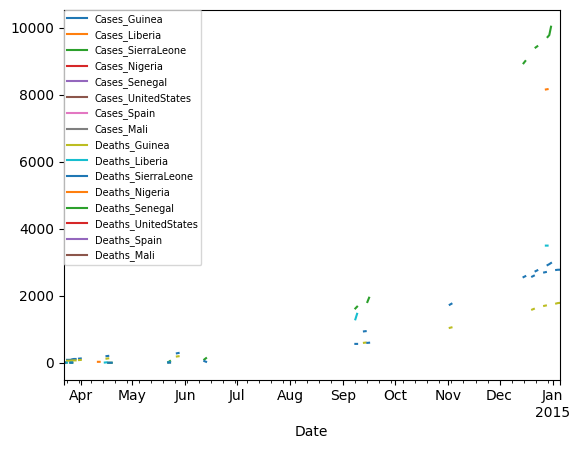

In [ ]:
fig, ax = plt.subplots()
ax = ebola_shift.iloc[:,:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

지금까지 만든 데이터프레임으로 다시 그린 그래프이다.